In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [107]:
df = pd.read_csv('/Users/priya/Documents/Final Capstone/yelp_dataset/Cleaned_Cusine_Data.csv')  

In [108]:
s = df.sample(frac =.25) 

In [109]:
s.shape

(171834, 19)

In [110]:
plt.style.use('ggplot')

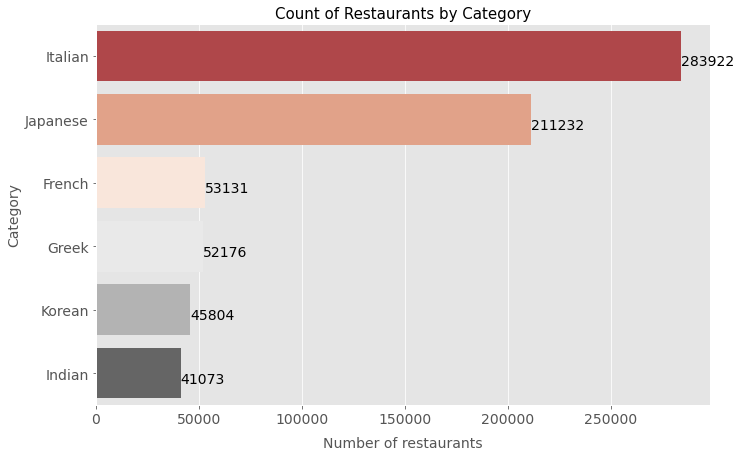

In [147]:
#full dataframe
plt.figure(figsize=(11,7))
grouped = df.category.value_counts()
sns.countplot(y='category',data=df, 
              order = grouped.index, palette= sns.color_palette("RdGy", len(grouped)))
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Category', fontsize=14)
plt.title('Count of Restaurants by Category', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df.category.value_counts()):
    plt.text(v, i+0.15, str(v), fontsize=14)

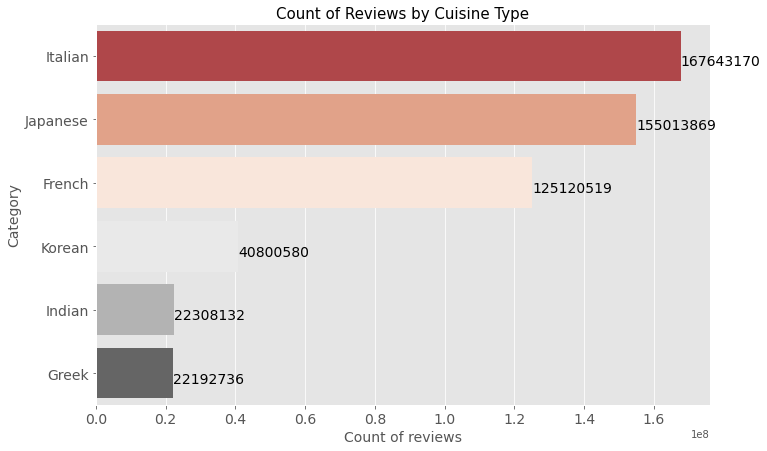

In [114]:
#full dataframe
plt.figure(figsize=(11,7))
grouped = df.groupby('category')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("RdGy", len(grouped)) )
plt.ylabel('Category', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v), fontsize=14)
plt.tick_params(labelsize=14)

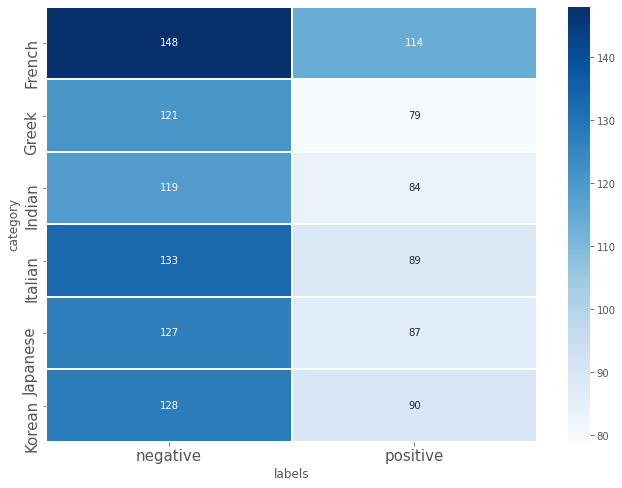

In [146]:
#full dataframe
#Average length of words in each category
table = df.groupby(['category','labels'])['num_words_review'].mean().round().unstack()
plt.figure(figsize=(11,8))
sns.heatmap(table, cmap='Blues', fmt='g',annot=True, linewidths=1)
plt.tick_params(labelsize=15)


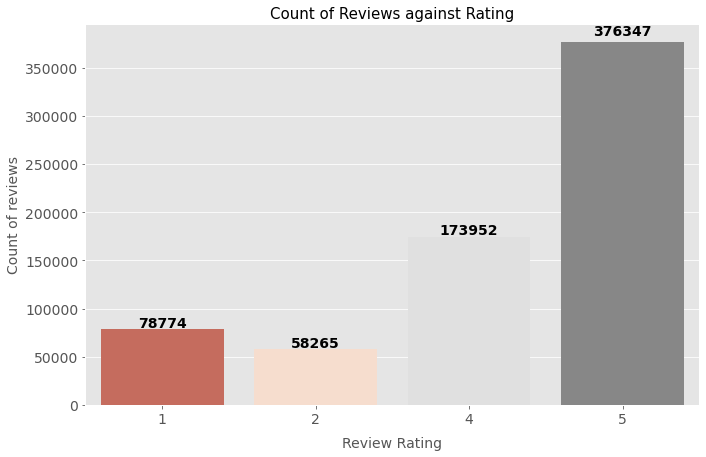

In [116]:
#bigdata
plt.figure(figsize=(11,7))
grouped = df.review_stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdGy", len(grouped)))
plt.xlabel('Review Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews against Rating', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

In [ ]:
#redo code below, test both full dataframe and sample to see if comp freezes or not

In [62]:
## convert text to lower case
rows.text = rows.text.str.lower()

In [63]:
## remove unnecessary punctuation
rows['removed_punct_text']= rows.text.str.replace('\n',''). \
                                          str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')

In [26]:
## import positive file which contains common meaningless positive words such as good
file_positive = open('/Users/priya/Documents/Final Capstone/yelp_dataset/positive-words.txt')
reader =csv.reader(file_positive)
positive_words = [word[0] for word in reader]

## import negative file which contains common meaningless positive words such as bad
file_negative = open('/Users/priya/Documents/Final Capstone/yelp_dataset/negative-words.txt')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]

In [66]:
## get dataset by category
def get_dataset(category):
    row2 = rows[['removed_punct_text','labels']][rows.category==category]
    row2.reset_index(drop=True, inplace =True)
    row2.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return row2

In [65]:
## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words

In [ ]:
##Greek

In [67]:
Greek_reviews = get_dataset('Greek')


In [68]:
Greek_train, Greek_test = train_test_split(Greek_reviews[['text','labels']],test_size=0.5)


In [69]:
def split_data(dataset, test_size):
    df_train, df_test = train_test_split(dataset[['text','labels']],test_size=test_size)
    return df_train

In [70]:
Greek_train.text = Greek_train.text.apply(filter_words)


In [71]:
terms_train=list(Greek_train['text'])
class_train=list(Greek_train['labels'])

terms_test=list(Greek_test['text'])
class_test=list(Greek_test['labels'])

In [125]:
vectorizer = CountVectorizer()
feature_train_counts=vectorizer.fit_transform(terms_train)
feature_train_counts.shape

(6386, 1831)

In [126]:
feature_test_counts=vectorizer.transform(terms_test)
feature_test_counts.shape

(6387, 1831)

In [117]:
## run model
svm = LinearSVC()
svm.fit(feature_train_counts, class_train)

LinearSVC()

In [129]:
predictions = svm.predict(feature_test_counts)
predictions

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'positive'], dtype='<U8')

In [133]:
sklearn.metrics.confusion_matrix(class_test, predictions)

array([[ 751,  310],
       [ 157, 5169]])

In [ ]:
F1 = 2 * (precision * recall) / (precision + recall)

In [74]:
coeff = svm.coef_[0]
Greek_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})

In [75]:
Greek_reviews = pd.DataFrame(feature_train_counts.toarray(), columns=vectorizer.get_feature_names())
Greek_reviews['labels'] = class_train
Greek_frequency = Greek_reviews[Greek_reviews['labels'] =='positive'].sum()[:-1]

In [76]:
Greek_words_score.set_index('word', inplace=True)

In [77]:
Greek_polarity_score = Greek_words_score
Greek_polarity_score['frequency'] = Greek_frequency

In [78]:
Greek_polarity_score['polarity'] = Greek_polarity_score.score * Greek_polarity_score.frequency / Greek_reviews.shape[0]

In [79]:
## drop unnecessary words
unuseful_positive_words = Greek_polarity_score.loc[['great','amazing','love','best','awesome','excellent','good',
                                                    'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous']]
unuseful_negative_words =  Greek_polarity_score.loc[['bad','disappointed','unfortunately','disappointing','horrible',
                                                     'lacking','terrible','sorry', 'disappoint']]

Greek_polarity_score.drop(unuseful_positive_words.index, axis=0, inplace=True)
Greek_polarity_score.drop(unuseful_negative_words.index, axis=0, inplace=True)

In [80]:
Greek_polarity_score.polarity = Greek_polarity_score.polarity.astype(float)
Greek_polarity_score.frequency = Greek_polarity_score.frequency.astype(float)

In [84]:
Greek_polarity_score[Greek_polarity_score.polarity>0].sort_values('polarity', ascending=False)[:20]


,score,frequency,polarity
word,,,
delicious,0.5875,1595.0000,0.1467
friendly,0.3812,1052.0000,0.0628
fresh,0.2097,1244.0000,0.0409
outstanding,0.9712,144.0000,0.0219
die,1.1076,120.0000,0.0208
generous,0.7335,164.0000,0.0188
recommend,0.1965,612.0000,0.0188
reasonable,0.6837,165.0000,0.0177
tender,0.5459,194.0000,0.0166


In [85]:
def get_top_words(dataset, label, number=20):
    if label == 'positive':
        df = dataset[dataset.polarity>0].sort_values('polarity',ascending = False)[:number]
    else:
        df = dataset[dataset.polarity<0].sort_values('polarity')[:number]
    return df

In [87]:
get_top_words(Greek_polarity_score,'negative',20)


,score,frequency,polarity
word,,,
warm,-0.1789,185.0000,-0.0052
miss,-0.5426,59.0000,-0.0050
hard,-0.1803,135.0000,-0.0038
slow,-0.3868,60.0000,-0.0036
problem,-0.5172,43.0000,-0.0035
bland,-0.8439,26.0000,-0.0034
bright,-0.6402,34.0000,-0.0034
cold,-0.3415,63.0000,-0.0034
crowded,-0.3842,53.0000,-0.0032
